In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from __future__ import print_function
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from datetime import datetime
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import *
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import re

In [88]:
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 600)
data_bots = pd.read_csv('bots.csv')
data_nonbots = pd.read_csv('nonbots.csv')
frames = [data_bots, data_nonbots]
train = pd.concat(frames)
test = pd.read_csv('test2.csv')
test_copy1 = pd.read_csv('kaggle.csv')

In [89]:
print(train.bot.value_counts())
print(test.shape)


0    1176
1    1056
Name: bot, dtype: int64
(616, 20)


In [90]:
train.head(4)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1


In [91]:
#Cleaning the test data to the required size 
test = test.dropna(how = 'all')
print(test.shape)
train = train.dropna(how = 'all')
print(train.shape)
test.head(5)
test = test.replace('None', np.nan)
test = test.replace('NaN', np.nan)
#test.location = test.location.fillna(0)


(575, 20)
(2232, 20)


In [92]:
#Check for null values
pd.isnull(train).values.any()
# Check if 'location' attribute is null or not
train['not_location']= pd.isnull(train.location).astype(bool)
test['not_location']= pd.isnull(test.location).astype(bool)
#train.location = train.location.fillna('')
#Check if 'description' attribute is null or not

train['description'] = train['description'].fillna('No Description')
test['description'] = test['description'].fillna('No Description') 
#test.description = test.description.replace('None', 'No Description')

test.name = test.name.fillna(" ")
test.screen_name = test.screen_name.fillna(" ")
#Finding metrics

train['location_count'] = train.location.str.len()
test['location_count'] = test.location.str.len()

train['screen_name_count'] = train.screen_name.str.len()
test['screen_name_count'] = test.screen_name.str.len()

train['description_count'] = train.description.str.len()
test['description_count'] = test.description.str.len()

train['name_count'] = train.name.str.len()
test['name_count'] = test.name.str.len()

train['screen_name'] = train['screen_name'].fillna(" ")
train['name'] = train['name'].fillna(" ")
train['status'] = train['status'].fillna(" ")

test['status'] = test['status'].fillna(" ")

test['default_profile'] = test['default_profile'].fillna(True)
test['default_profile_image'] = test['default_profile_image'].fillna(True)

train['default_profile'] = train['default_profile'].fillna(True)
train['default_profile_image'] = train['default_profile_image'].fillna(True)





In [93]:
### Check if the Screen_Name of the User has 'bot' in it
#bots = ['bot','BOT','']
regex = r"\s*b.t\s*"
i = 0
train_sname_bot=[]
for row in train.screen_name:
   # print(row)
    if (re.search(regex, row.lower())):
        train_sname_bot.append(1)
    else:
        train_sname_bot.append(0)
train['sname_bot']=train_sname_bot

test_sname_bot=[]
for row in test.screen_name:
    if (re.search(regex, row.lower())):
        #print(row)
        test_sname_bot.append(1)
    else:
        test_sname_bot.append(0)
test['sname_bot']=test_sname_bot
#print(test.sname_bot.value_counts())

### Check if the Name of the User has 'bot' in it
train_name_bot=[]
for row in train.name:
    if (re.search(regex, row.lower())):
        train_name_bot.append(1)
    else:
        train_name_bot.append(0)
train['name_bot']=train_name_bot      

test_name_bot=[]
for row in test.name:
    #i = i + 1
    #print (i, row)
    if (re.search(regex, row.lower())):
        test_name_bot.append(1)
    else:
        test_name_bot.append(0)
test['name_bot']=test_name_bot

### Check if the Description of the User has 'bot' in it
train_des_bot=[]
for row in train['description']:
        if (re.search(regex, row.lower())):
            train_des_bot.append(1)
        else:
            train_des_bot.append(0)
train['des_bot']=train_des_bot


test_des_bot=[]
for row in test['description']:
        if (re.search(regex, row.lower())):
            test_des_bot.append(1)
        else:
            test_des_bot.append(0)
test['des_bot']=test_des_bot


train_status_bot=[]
for row in train['status']:
        #print(line)
        if (re.search(regex, row.lower())):
            train_status_bot.append(1)
        else:
            train_status_bot.append(0)
train['status_bot']=train_status_bot

status_bot=[]
for row in test['status']:
        if (re.search(regex, row.lower())):
            status_bot.append(1)
        else:
            status_bot.append(0)
test['status_bot']=status_bot

train['bot_nd']=train.apply(lambda row: ((row['name_bot'] or row['sname_bot']) ),axis=1)
test['bot_nd']=test.apply(lambda row: ((row['name_bot'] or row['sname_bot']) ),axis=1)

In [94]:
#train['bot_nd']

In [95]:
# For training set
scratch = train.copy()
scratch['age'] = 0;
#Check for not null values 
age = scratch['created_at']

#For test set
test_scratch = test.copy()
#test_scratch = t_df.copy()
test_scratch['age'] = 0;
t_age = test_scratch['created_at']
print(pd.isnull(age).values.any())


False


In [96]:
#cleaning the dataframe containing dates based on the data we saw 
scratch['created_at'] = scratch['created_at'].map(lambda x: x.lstrip('"').rstrip('"'))

#converting to datetime format of pandas for age calculation 
scratch['created_at'] = pd.to_datetime(scratch['created_at'], coerce=True)

#cleaning the dataframe containing dates based on the data we saw 
test_scratch['created_at'] = test_scratch['created_at'].map(lambda x: x.lstrip('"').rstrip('"'))

#converting to datetime format of pandas for age calculation 
test_scratch['created_at'] = pd.to_datetime(test_scratch['created_at'], coerce=True)

/Users/abhishekkuntal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
/Users/abhishekkuntal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [97]:
scratch['created_at'].dtype

dtype('<M8[ns]')

In [98]:
#print(scratch.created_at.head(5)_
#scr_t.created_at.head(5)

In [99]:
#Training 
c_date = scratch['created_at']
#Check the conversion went through smoothly
#print(c_date.shape)

#Check for non null values
nulls=(age.notnull()==False)
print(nulls.value_counts())
print(age.dtype)

#Testing
t_date = test_scratch['created_at']
#Check the conversion went through smoothly
#print(t_date.shape)

#Check for non null values
null_t=(t_age.notnull()==False)
print(null_t.value_counts())
print (t_age.dtype)

False    2232
Name: created_at, dtype: int64
object
False    575
Name: created_at, dtype: int64
object


In [100]:
x = scratch[['age']].copy()
now = datetime.now()
now = now.date()
x['age'] = now - c_date


#Converting date time to numeric for calculation 
x['age'] = x['age'].astype('timedelta64[D]')

#find outliers 
#X = x['age'].astype('timedelta64[D]')
X = x['age'].copy()
X['C_sign'] = np.sign(X)
###Value counts to see any outliers for the data
print(X['C_sign'].value_counts())

indx = X['C_sign'] > 0
print(indx.value_counts())

### Deal with the outliers of the data convert it to the statistical mean of the data check how to do that using other attributes 
### for the time being fill it with mean 

z = indx[indx == False].index.tolist()
print(scratch['created_at'].iloc[z])

#see the values at those index
# outliers values replace it with mean should be fine for now
print(x.iloc[z])

 1.0    2213
-1.0      19
Name: age, dtype: int64
True     2213
False      19
Name: age, dtype: int64
15    2017-12-03 14:59:00
41    2017-12-03 18:47:00
127   2017-12-03 15:18:00
194   2017-12-03 19:19:00
236   2017-12-03 04:12:00
302   2017-12-03 18:26:00
345   2017-12-03 18:48:00
364   2017-09-03 04:08:00
401   2017-09-03 16:25:00
498   2017-11-03 07:07:00
513   2017-12-03 19:23:00
549   2017-09-03 16:01:00
653   2017-10-03 13:46:00
727   2017-12-03 19:06:00
735   2017-11-03 10:48:00
762   2017-12-03 11:58:00
764   2017-09-03 02:42:00
898   2017-12-03 04:27:00
950   2017-12-03 18:55:00
Name: created_at, dtype: datetime64[ns]
       age
15  -210.0
41  -210.0
127 -210.0
194 -210.0
236 -210.0
302 -210.0
345 -210.0
364 -119.0
401 -119.0
498 -180.0
513 -210.0
549 -119.0
653 -149.0
727 -210.0
735 -180.0
762 -210.0
764 -119.0
898 -210.0
950 -210.0


In [101]:
#code to find not null indexes
#inds = pd.isnull(y).nonzero()[0]
#code for seeing the data in those rows and coloumns
#scratch['created_at'].iloc[inds]
#ind = pd.isnull(indx).nonzero()[0]

In [102]:
##test data 
xt = test_scratch[['age']].copy()
now = datetime.now()
now = now.date()
xt['age'] = now - t_date


#Converting date time to numeric for calculation 
xt['age'] = xt['age'].astype('timedelta64[D]')

#find outliers 
#X = x['age'].astype('timedelta64[D]')
Xt = xt['age'].copy()
Xt['C_sign'] = np.sign(Xt)
###Value counts to see any outliers for the data
print(Xt['C_sign'].value_counts())

indxt = Xt['C_sign'] > 0
print(indxt.value_counts())

### Deal with the outliers of the data convert it to the statistical mean of the data check how to do that using other attributes 
### for the time being fill it with mean 

zt = indxt[indxt == False].index.tolist()
print(test_scratch['created_at'].iloc[zt])

#see the values at those index
# outliers values replace it with mean should be fine for now
print(xt.iloc[zt])


1.0    575
Name: age, dtype: int64
True    575
Name: age, dtype: int64
Series([], Name: created_at, dtype: datetime64[ns])
Empty DataFrame
Columns: [age]
Index: []


In [103]:
scratch['age'] = x['age']
test_scratch['age'] = xt['age']

In [104]:
checking = x[['age']].copy()
test_checking = xt[['age']].copy()

In [105]:
#replace outlier with nan for correct mean calculation
checking.iloc[z,0] = np.nan
print(checking.shape)
#replace with mean for now. Todo find a better way to replace them. 

#checking['age'] = checking['age'].fillna(checking['age'].median())
scratch['age'] = checking['age']
#scratch = scratch.dropna(subset=['age'])
#checking = checking.dropna(subset=['age'])
print(checking.shape)
print(scratch.shape)
print(test_checking.age.mean())
print(test_checking.age.median())
print(test_checking.age.mode())
# Do the same for test
test_checking.iloc[zt,0] = np.nan
#test_checking['age'] = test_checking['age'].fillna(test_checking['age'].median())


(2232, 1)
(2232, 1)
(2232, 31)
1706.76173913
1783.0
0     735.0
1    1680.0
dtype: float64


In [106]:
#isd.age = isd.age.dropna()
#isd = isd.dropna(subset=['age'])
#print (isd.shape)

In [107]:
#check values substituted
print(checking['age'].iloc[z])
print(test_checking['age'].iloc[zt])

15    NaN
41    NaN
127   NaN
194   NaN
236   NaN
302   NaN
345   NaN
364   NaN
401   NaN
498   NaN
513   NaN
549   NaN
653   NaN
727   NaN
735   NaN
762   NaN
764   NaN
898   NaN
950   NaN
Name: age, dtype: float64
Series([], Name: age, dtype: float64)


In [108]:
scratch['age'] = checking['age']
test_scratch['age'] = test_checking['age']

In [109]:
#Shuffle the dataset for using  the dataset 
#shuffled = scratch
#shuffled = shuffled.sample(frac=1).reset_index(drop=True)
print(scratch.shape)
scratch = scratch.dropna(subset=['age'])
print(scratch.shape)

(2232, 31)
(2213, 31)


In [110]:
r_forest = scratch.copy()
test_forest = test_scratch.copy()

In [111]:
test_forest.shape

(575, 31)

In [112]:
#test_forest.head(10)

In [113]:
#(r_forest.columns[['id','id_str','screen_name','location','description','url','name']],
#r_forest.fillna(r_forest.mean())
r_forest['has_extended_profile'] = r_forest['has_extended_profile'].fillna(0)
r_forest['url'] = r_forest['url'].str.len()
# r_forest['followers_count'] = r_forest['friends_count']/r_forest['followers_count']
# r_forest['followers_count'] = r_forest['followers_count'].replace(np.inf, 0)


In [114]:
test_forest.tail(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favorites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot,not_location,location_count,screen_name_count,description_count,name_count,sname_bot,name_bot,des_bot,status_bot,bot_nd,age
565,8.432704e+08,NaN,YankeeIKD_bot,NaN,æ¬¡å±‹ãƒ³ã‚­ãƒ¼bot(@tsugiyankee_bot )ã®æ´¾ç”Ÿ...,NaN,120,71,3,2012-09-24 09:38:05,NaN,NaN,51891.0,ja,"{u'lang': u'ja', u'text': u'\u304b\u307e\u307c...",TRUE,TRUE,NaN,ãƒ¤ãƒ³ã‚­ãƒ¼æ± ç”°,NaN,True,NaN,13,535,38,1,0,1,1,1,1686.0
566,2.564439e+09,NaN,yaohan_bot,NaN,é¹¿æ²¼å¸‚ã®ãƒ¤ã‚ªãƒãƒ³ãƒ•ãƒ¼ãƒ‰ã‚»ãƒ³ã‚¿ãƒ¼ã...,NaN,113,226,3,2014-06-13 02:10:38,NaN,NaN,24115.0,ja,"{u'lang': u'ja', u'text': u'\u307f\u3093\u306a...",TRUE,True,NaN,ãƒ¤ã‚ªãƒãƒ³ãƒ•ãƒ¼ãƒ‰ã‚»ãƒ³ã‚¿ãƒ¼ï¼ˆéžå…¬å¼ï...,NaN,True,NaN,10,105,106,1,1,1,1,1,1059.0
567,3.427375e+08,NaN,Yar30_bot,NaN,No Description,NaN,66,84,5,2011-07-26 14:13:54,NaN,NaN,234290.0,ja,"{u'lang': u'ja', u'text': u'@generanai_bot \u5...",TRUE,TRUE,NaN,ã‚¹ãƒæ¯›bot,NaN,True,NaN,9,14,23,1,1,0,1,1,2112.0
568,5.660780e+08,NaN,yota_bot,å‘å³¶,æ˜­å’Œå…ƒç¦„è½èªžå¿ƒä¸­ã®ä¸Žå¤ªéƒŽã®éžå…¬å...,NaN,47,16,3,2012-04-29 07:28:15,NaN,NaN,178704.0,ja,"{u'lang': u'ja', u'text': u'@yakumo_shisho \u3...",TRUE,True,NaN,ä¸Žå¤ªéƒŽ,NaN,False,13.0,8,572,18,1,0,1,1,1,1834.0
569,2.688096e+08,268809577,youngvulgarian,London,@BuzzFeedNews media & politics reporter / @WBW...,https://t.co/u9BcaziRTb,26841,3359,491,2011-03-19 14:21:55,130876,FALSE,90417.0,en,{'created_at': 'Tue Apr 11 18:37:35 +0000 2017...,FALSE,FALSE,FALSE,Marie Le Conte,NaN,False,6.0,14,115,14,0,0,0,1,0,2241.0
570,7.509990e+17,7.51E+17,yourtechbot,"California, USA",Built with special algorithm to retweet about ...,https://t.co/EX2WJ8tr3Z,1551,138,3119,2016-07-07 10:23:00,1,FALSE,37318.0,en,"{'favorite_count': 1, 'id': 805700033458872320...",TRUE,FALSE,TRUE,TechBot,NaN,False,15.0,11,159,7,1,1,1,1,1,304.0
571,1.022827e+07,NaN,YouTube,"San Bruno, CA",lol watch this,https://t.co/F3fLcf5sH7,67697733,998,82023,2007-11-13 21:43:46,NaN,TRUE,19364.0,en,"{u'lang': u'en', u'text': u'The speed run to e...",True,True,NaN,YouTube,NaN,False,13.0,7,14,7,0,0,0,0,0,3463.0
572,2.188339e+08,NaN,Yuki_Haruna_bot,ä¿®æ™ºé¤¨å­¦é™¢,PCã‚²ãƒ¼ãƒ ãƒ¡ãƒ¼ã‚«ãƒ¼ã€ŒAugustã€ã®ã‚²ãƒ¼ãƒ...,http://t.co/OXkSU7iF4D,1257,363,75,2010-11-23 11:35:02,NaN,NaN,388672.0,ja,"{u'lang': u'ja', u'text': u'\u3054\u3081\u3093...",TRUE,True,NaN,æ‚ æœ¨é™½èœ,NaN,False,32.0,15,504,26,1,0,1,0,1,2357.0
573,1.765662e+08,NaN,zaynmalik,LA,pathetically aestheticðŸŠhttps://t.co/f2zHtV0s2J,https://t.co/aoYRSS2yDT,21585872,2279,128136,2010-08-09 21:54:10,NaN,TRUE,3318.0,en,"{u'lang': u'und', u'text': u';) https://t.co/p...",True,True,NaN,zayn,NaN,False,3.0,9,53,4,0,0,0,0,0,2463.0
574,3.119555e+09,3119554528,zaynmalik_ITBot,NaN,I'm an Intelligent Twitter Bot that tweets wit...,https://t.co/Rbo82dq00m,64,80,3,2015-03-26 19:25:00,0,FALSE,43438.0,en,"{'favorite_count': 1, 'id': 639229556566700032...",TRUE,FALSE,FALSE,zaynmalik1D_ITBot,NaN,True,NaN,15,130,17,1,1,1,1,1,773.0


In [115]:
#print(test_forest.has_extended_profile)


#test_forest = test_forest.fillna(0)
#r_forest = r_forest.fillna(0)
#r_forest = r_forest.fillna(r_forest.median)
#test_forest = test_forest.fillna(r_forest.median)
#r_forest['url'] = r_forest['url'].fillna(0)
#print(test_forest.has_extended_profile

In [116]:
#df2.replace('NaN',0)
#test_forest.has_extended_profile = test_forest.has_extended_profile.replace('None', 'FALSE')
test_forest['has_extended_profile'] = test_forest['has_extended_profile'].fillna(0)
test_forest['url'] = test_forest['url'].str.len()
test_forest.has_extended_profile = test_forest.has_extended_profile.replace('FALSE', 0)
test_forest.has_extended_profile = test_forest.has_extended_profile.replace('TRUE', 1)
# test_forest.url = test_forest.url.replace('None', '')
# test_forest.url = test_forest.fillna("")
# test_forest.url = test_forest.url.replace('FALSE', 0)
# test_forest.url = test_forest.url.replace('TRUE', 1)
# test_forest.url = test_forest.url.fillna(0)
#te
#r_forest.head(1)

In [117]:
r_forest.url = r_forest.url.fillna(0)
test_forest.url = test_forest.url.fillna(0)
print(sum(r_forest['listedcount'].isnull()) )
print(sum(r_forest['followers_count'].isnull()) )
print(sum(r_forest['favourites_count'].isnull()) )
print(sum(r_forest['statuses_count'].isnull()) )
#print(sum(r_forest['listedcount'].isnull()) )
print(sum(test_forest['listed_count'].isnull()) )
print(sum(test_forest['followers_count'].isnull()) )
print(sum(test_forest['favorites_count'].isnull()) )
print(sum(test_forest['statuses_count'].isnull()) )



0
0
0
0
21
1
196
0


In [118]:
#r_forest.drop('id', axis = 1, inplace = True)
r_forest.drop('id_str', axis = 1, inplace = True)
r_forest.drop('screen_name', axis = 1, inplace = True)
r_forest.drop('location', axis = 1, inplace = True)
r_forest.drop('description', axis = 1, inplace = True)
#r_forest.drop('url', axis = 1, inplace = True)
r_forest.drop('name', axis = 1, inplace = True)
r_forest.drop('status', axis = 1, inplace = True)
r_forest.drop('created_at', axis = 1, inplace = True)
r_forest.drop('lang', axis =1, inplace = True)
# r_forest.drop('name_bot', axis =1, inplace = True)
# r_forest.drop('sname_bot', axis =1, inplace = True)
# r_forest.drop('des_bot', axis =1, inplace = True)



In [119]:
#test_forest.drop('id', axis = 1, inplace = True)
test_forest.drop('id_str', axis = 1, inplace = True)
test_forest.drop('screen_name', axis = 1, inplace = True)
test_forest.drop('location', axis = 1, inplace = True)
test_forest.drop('description', axis = 1, inplace = True)
#test_forest.drop('url', axis = 1, inplace = True)
test_forest.drop('name', axis = 1, inplace = True)
test_forest.drop('status', axis = 1, inplace = True)
test_forest.drop('created_at', axis = 1, inplace = True)
test_forest.drop('lang', axis =1, inplace = True)
# test_forest.drop('name_bot', axis =1, inplace = True)
# test_forest.drop('sname_bot', axis =1, inplace = True)
# test_forest.drop('des_bot', axis =1, inplace = True)

# Rename the coloumn 

test_forest.rename(columns={'listed_count': 'listedcount', 'favorites_count': 'favourites_count'}, inplace=True)

In [120]:
r_forest = r_forest.sample(frac=1).reset_index(drop=True)

In [121]:
r_forest['url'] = r_forest['url'].replace(4,0)
r_forest.verified = r_forest.verified.astype(int)
r_forest.default_profile = r_forest.default_profile.astype(int)
r_forest.default_profile_image = r_forest.default_profile_image.astype(int)
r_forest.has_extended_profile = r_forest.has_extended_profile.astype(int)
r_forest.not_location = r_forest.not_location.astype(int)
#r_forest.url = r_forest.url.astype(int)



In [122]:
test_forest.verified = r_forest.verified.astype(int)
test_forest.default_profile = r_forest.default_profile.astype(int)
test_forest.default_profile_image = r_forest.default_profile_image.astype(int)
test_forest.has_extended_profile = test_forest.has_extended_profile.astype(int)
test_forest.not_location = test_forest.not_location.astype(int)
#test_forest.url = test_forest.url.astype(int)
test_forest.followers_count = test_forest.followers_count.fillna(0)
test_forest.friends_count = test_forest.friends_count.fillna(0)
test_forest.favourites_count = test_forest.favourites_count.fillna(0)
test_forest.statuses_count = test_forest.statuses_count.fillna(0)
test_forest.listedcount = test_forest.listedcount.fillna(0)

In [123]:
#test_forest.has_extended_profile #= test_forest.has_extended_profile.astype(int, coerce = True)

# norm = r_forest.copy()
# norm1 = test_forest.copy()
# scaler = Normalizer() 
  
# norm_filter = norm[['followers_count','friends_count','listedcount','statuses_count','age','favourites_count','location_count','screen_name_count','description_count','name_count']]
# scaled_values = scaler.fit_transform(norm_filter) 
# norm[['followers_count','friends_count','listedcount','statuses_count','age','favourites_count','location_count','screen_name_count','description_count','name_count']] = scaled_values


# norm_filter1 = norm1[['followers_count','friends_count','listedcount','statuses_count','age','favourites_count','location_count','screen_name_count','description_count','name_count']]
# scaled_values1 = scaler.fit_transform(norm_filter1) 
# norm1[['followers_count','friends_count','listedcount','statuses_count','age','favourites_count','location_count','screen_name_count','description_count','name_count']] =  scaled_values1
# norm.head(5)

# r_forest = norm
# test_forest = norm1
# r_forest.head(1)

# r_forest.drop('name_bot', axis = 1, inplace = True)
# r_forest.drop('sname_bot', axis = 1, inplace = True)
# r_forest.drop('des_bot', axis = 1, inplace = True)

# test_forest.drop('name_bot', axis = 1, inplace = True)
# test_forest.drop('sname_bot', axis = 1, inplace = True)
# test_forest.drop('des_bot', axis = 1, inplace = True)




# test_forest.drop('lang', axis =1, inplace = True)
# test_forest.drop('screen_name', axis = 1, inplace = True)





In [124]:
r_forest.head(10)

,id,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,not_location,location_count,screen_name_count,description_count,name_count,sname_bot,name_bot,des_bot,status_bot,bot_nd,age
0,8.250000e+17,0.0,0,256,0,13,0,11,1,0,0,1,0,15.0,8,159,11,0,0,1,0,0,100.0
1,7.410000e+17,0.0,20,96,0,374,0,1,1,0,0,1,1,NaN,9,22,9,0,0,0,0,0,332.0
2,2.661230e+09,22.0,864,5,62,0,0,23022,0,0,0,1,0,14.0,12,90,12,1,1,1,1,1,1022.0
3,2.465113e+09,0.0,8,5,6,0,0,27,1,0,0,1,1,NaN,15,14,18,1,1,0,1,1,1107.0
4,2.322860e+07,0.0,2018998,2367,9238,1733,1,11443,0,0,1,0,1,NaN,12,14,13,0,0,0,1,0,2983.0
5,3.395796e+09,0.0,9,0,7,0,0,130,1,0,0,1,1,NaN,14,153,13,0,0,1,0,0,647.0
6,5.250721e+07,0.0,110,219,0,2,0,57,1,0,0,0,0,15.0,11,29,12,0,0,0,1,0,2868.0
7,8.260000e+17,0.0,0,111,0,2,0,1,1,1,1,1,0,12.0,13,14,14,0,0,0,1,0,96.0
8,2.246143e+07,22.0,4651330,509,32051,3060,1,3545,0,0,0,0,0,11.0,10,27,11,0,0,0,1,0,2988.0
9,8.410000e+17,0.0,0,30,0,0,0,0,1,1,0,1,1,NaN,10,14,8,0,0,0,0,0,56.0


In [125]:
r_forest.head(1)

,id,url,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot,not_location,location_count,screen_name_count,description_count,name_count,sname_bot,name_bot,des_bot,status_bot,bot_nd,age
0,8.250000e+17,0.0,0,256,0,13,0,11,1,0,0,1,0,15.0,8,159,11,0,0,1,0,0,100.0


In [126]:
test_forest.columns

Index([u'id', u'url', u'followers_count', u'friends_count', u'listedcount', u'favourites_count', u'verified', u'statuses_count', u'default_profile', u'default_profile_image', u'has_extended_profile', u'bot', u'not_location', u'location_count', u'screen_name_count', u'description_count', u'name_count', u'sname_bot', u'name_bot', u'des_bot', u'status_bot', u'bot_nd', u'age'], dtype='object')

In [127]:

col = ['age','statuses_count','friends_count','followers_count','listedcount','favourites_count','has_extended_profile','not_location']
#col1 = ['sname_bot','des_bot','name_bot','followers_count','listedcount','has_extended_profile','favourites_count','age','statuses_count','not_location','friends_count']
#col1 = ['bot_nd','des_bot','sname_bot','name_bot','status_bot','listedcount','has_extended_profile','statuses_count','age','friends_count','favourites_count','not_location','verified']
col1 = ['sname_bot','des_bot','name_bot','status_bot', 'has_extended_profile', 'followers_count','age','listedcount','favourites_count','friends_count','statuses_count','default_profile','default_profile_image','verified']
col2 = ['followers_count','age','listedcount','favourites_count','friends_count','statuses_count']
#94test#col1 = ['bot_nd','des_bot','sname_bot','name_bot','status_bot', 'has_extended_profile', 'followers_count','age','listedcount','favourites_count','friends_count','not_location','statuses_count']






In [128]:
#split the dataset 
r_train, r_test, rl_train, rl_test = train_test_split(r_forest.ix[:,col], r_forest['bot'], test_size=0.2, random_state = 2)
r1_train, r1_test, rl1_train, rl1_test = train_test_split(r_forest.ix[:,col1], r_forest['bot'], test_size=0.2, random_state = 2)


In [129]:
pd.isnull(r1_test).values.any()
#zt = r1_test[r1_test == False].index.tolist()


False

In [130]:
# rf = RandomForestClassifier(n_estimators=25)#,max_features = 'log2', oob_score = True)
# rf1 = GradientBoostingClassifier(n_estimators=200)
# rf2 = AdaBoostClassifier(n_estimators = 30,learning_rate = 0.1)
# rf.fit(r_train, rl_train)
# rf1.fit(r_train, rl_train)
# rf2.fit(r_train, rl_train)

# predicted = rf.predict(r_test)
# predicted1 = rf1.predict(r_test)
# predicted2 = rf2.predict(r_test)

# print("Precision Score =", metrics.precision_score(predicted, rl_test))
# print("Accuracy Score  =", metrics.accuracy_score(predicted, rl_test))
# # print("Recall Score    =", metrics.recall_score(predicted, rl_test))
# # print("F1 Score        =", metrics.f1_score(predicted, rl_test))
# # print("AUC Score       =", metrics.roc_auc_score(predicted, rl_test))
# print()
# print()
# print("Precision Score =", metrics.precision_score(predicted1, rl_test))
# print("Accuracy Score  =", metrics.accuracy_score(predicted1, rl_test))
# print()
# print()
# print("Precision Score =", metrics.precision_score(predicted2, rl_test))
# print("Accuracy Score  =", metrics.accuracy_score(predicted2, rl_test))



In [131]:
rfx = RandomForestClassifier(n_estimators=200)#,max_features = 'log2', oob_score = True)
rfx1 = GradientBoostingClassifier(n_estimators=200)
rfx2 = AdaBoostClassifier(n_estimators = 30,learning_rate = 0.1)

rfx.fit(r1_train, rl1_train)
rfx1.fit(r1_train, rl1_train)
rfx2.fit(r1_train, rl1_train)

predictedx1 = rfx.predict(r1_test)
predictedx2 = rfx1.predict(r1_test)
predictedx3 = rfx2.predict(r1_test)

Random Forest Classifier
Precision Score = 0.920930232558
Accuracy Score  = 0.914221218962
Recall Score    = 0.904109589041
F1 Score        = 0.912442396313
AUC Score       = 0.914108365949
ROC AUC: 0.91


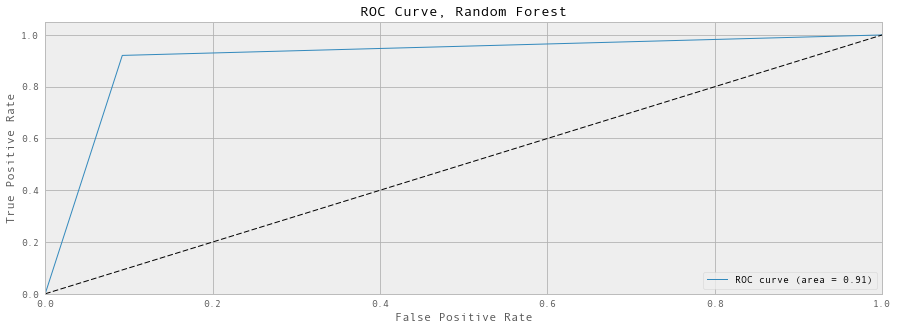

In [132]:
print("Random Forest Classifier")
print("Precision Score =", metrics.precision_score(predictedx1, rl_test))
print("Accuracy Score  =", metrics.accuracy_score(predictedx1, rl_test))
print("Recall Score    =", metrics.recall_score(predictedx1, rl_test))
print("F1 Score        =", metrics.f1_score(predictedx1, rl_test))
print("AUC Score       =", metrics.roc_auc_score(predictedx1, rl_test))

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(rl_test, predictedx1)
# Calculate the AUC
roc_auc = auc(fpr, tpr) 
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve, Random Forest') 
plt.legend(loc="lower right") 
plt.show()



Gradient Boost Classifier
Precision Score = 0.916279069767
Accuracy Score  = 0.916478555305
Recall Score    = 0.912037037037
F1 Score        = 0.914153132251
AUC Score       = 0.916370941426
ROC AUC: 0.92


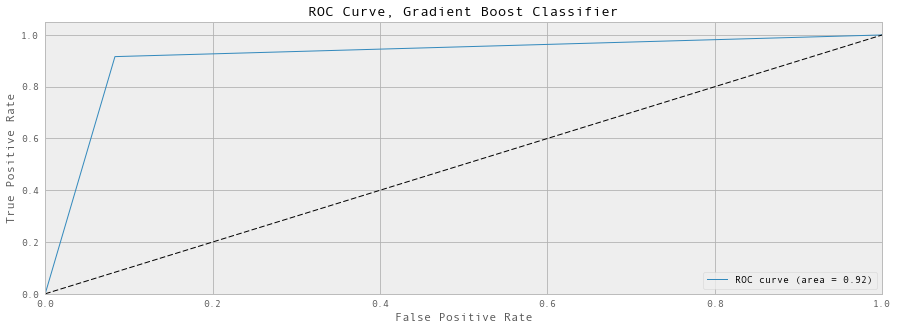

In [133]:
print()
print("Gradient Boost Classifier")
print("Precision Score =", metrics.precision_score(predictedx2, rl_test))
print("Accuracy Score  =", metrics.accuracy_score(predictedx2, rl_test))
print("Recall Score    =", metrics.recall_score(predictedx2, rl_test))
print("F1 Score        =", metrics.f1_score(predictedx2, rl_test))
print("AUC Score       =", metrics.roc_auc_score(predictedx2, rl_test))
fpr, tpr, _ = roc_curve(rl_test, predictedx2)
# Calculate the AUC
roc_auc = auc(fpr, tpr) 
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve, Gradient Boost Classifier') 
plt.legend(loc="lower right") 

Ada Boost Classifier
Precision Score = 0.925581395349
Accuracy Score  = 0.882618510158
Recall Score    = 0.846808510638
F1 Score        = 0.884444444444
AUC Score       = 0.884942716858
ROC AUC: 0.92


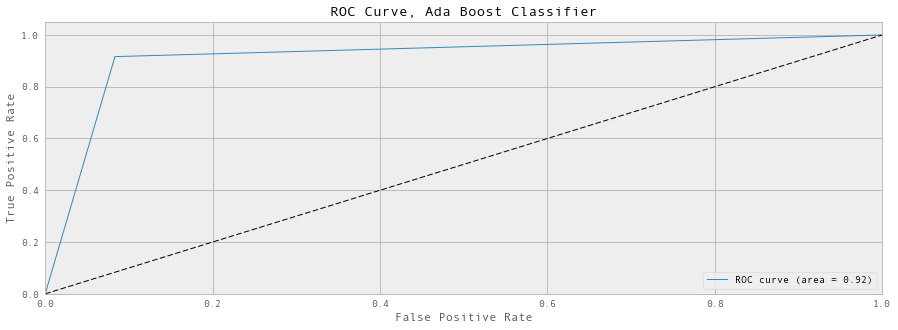

In [134]:
# Calculate the AUC
print("Ada Boost Classifier")
print("Precision Score =", metrics.precision_score(predictedx3, rl_test))
print("Accuracy Score  =", metrics.accuracy_score(predictedx3, rl_test))
print("Recall Score    =", metrics.recall_score(predictedx3, rl_test))
print("F1 Score        =", metrics.f1_score(predictedx3, rl_test))
print("AUC Score       =", metrics.roc_auc_score(predictedx3, rl_test))
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve, Ada Boost Classifier') 
plt.legend(loc="lower right") 


In [135]:
final_train = r_forest.ix[:,col]
final_fit = r_forest.ix[:,['bot']]
#train_without.drop('age', axis =1, inplace = True)
final_train1 = r_forest.ix[:,col1]
final_fit1 = r_forest.ix[:,['bot']]




In [136]:
final_train1.head(2)

,sname_bot,des_bot,name_bot,status_bot,has_extended_profile,followers_count,age,listedcount,favourites_count,friends_count,statuses_count,default_profile,default_profile_image,verified
0,0,1,0,0,0,0,100.0,0,13,256,11,1,0,0
1,0,0,0,0,0,20,332.0,0,374,96,1,1,0,0


In [139]:
final = RandomForestClassifier(n_estimators=200)
final.fit(final_train,final_fit)
final1 = RandomForestClassifier(n_estimators=200)
final1.fit(final_train1,final_fit1)
y = test_forest.ix[:,col1]
sub1 = final1.predict(y)
metrics.accuracy_score(sub1, test_copy1.bot)

/Users/abhishekkuntal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/Users/abhishekkuntal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.94782608695652171

In [140]:
output = pd.DataFrame(data={"Id":id, "bot":sub1})
print(metrics.accuracy_score(output.bot, test_copy1.bot))
#output.to_csv("result_modified_97rfcorrect.csv", index=False)

0.947826086957


In [141]:
norm = final_train1.copy()
scaler = Normalizer() 
scaled_values = scaler.fit_transform(norm[col2]) 
norm[col2] = scaled_values

normTest = test_forest.copy()
scaler = Normalizer() 
scaled_values = scaler.fit_transform(normTest[col2]) 
normTest[col2] = scaled_values

preTest = normTest.ix[:,col1]
test1 = preTest.values


In [142]:
dataset = norm.values
print(norm.shape)
size = norm.shape[1]
print (size)
X = test1[:,0:size]
y = test_copy1.bot.values

(2213, 14)
14


In [143]:
y.shape

(575,)

In [144]:
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(size, input_dim=size, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(size/2, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(size/4, kernel_initializer='normal', activation='relu'))
# #model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', class_mode='binary', optimizer='adam',metrics=['accuracy'])



model.fit(X, y,epochs=500,batch_size=128)
#model.fit(X, y,epochs=1500,batch_size=256)
#model.fit(X, y,epochs=1500,batch_size=512)
#model.fit(X, y,epochs=1500,batch_size=1024)
#score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/500
575/575 [==============================] - 0s - loss: 0.6917 - acc: 0.7061     
Epoch 2/500
575/575 [==============================] - 0s - loss: 0.6899 - acc: 0.8296     
Epoch 3/500
575/575 [==============================] - 0s - loss: 0.6875 - acc: 0.8400     
Epoch 4/500
575/575 [==============================] - 0s - loss: 0.6856 - acc: 0.8678     
Epoch 5/500
575/575 [==============================] - 0s - loss: 0.6816 - acc: 0.8939     
Epoch 6/500
575/575 [==============================] - 0s - loss: 0.6773 - acc: 0.8800     

In [145]:
normTest = test_forest.copy()
scaler = Normalizer() 
scaled_values = scaler.fit_transform(normTest[col2]) 
normTest[col2] = scaled_values

preTest = normTest.ix[:,col1]
test1 = preTest.values
test1.shape


(575, 14)

In [154]:
prediction = model.predict(test1)
rounded = [round(x[0]) for x in prediction]
metrics.accuracy_score(rounded, test_copy1.bot)

0.98782608695652174

In [155]:
# sub = final.predict(x)
id = test_forest.id

id = id.astype(np.int64)

output = pd.DataFrame(data={"Id":id, "bot":rounded})
output.bot = output.bot.astype(int)
print(metrics.accuracy_score(output.bot, test_copy1.bot))
#Save the output if improvement 
#output.to_csv("save.csv", index=False)


0.987826086957


In [156]:
#r_train['has_extended_profile'].value_counts()
test_copy1.bot.value_counts()

0    310
1    265
Name: bot, dtype: int64

In [157]:
output.bot.value_counts()

0    307
1    268
Name: bot, dtype: int64

In [158]:
# pca_a = r_forest.copy()

# pca_X = pca_a.ix[:,0:10]
# pca_X.head(2)

In [159]:
# using pca to find which attributes to drop 
# pca_std = StandardScaler().fit_transform(pca_X)
# sklearn_pca = sklearnPCA(0.90)
# Y_sklearn = sklearn_pca.fit_transform(pca_std)
# Y_sklearn.shape

In [160]:
comparison = pd.DataFrame(data={"Id":id, "bot":output.bot, "bot1": test_copy1.bot})
comp = (comparison.bot - comparison.bot1)
comp.value_counts()

 0    568
 1      5
-1      2
dtype: int64

In [161]:
print(comp.ix[comp == -1])
print(comp.ix[comp == 1])

179   -1
539   -1
dtype: int64
154    1
166    1
366    1
471    1
493    1
dtype: int64
